In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv('/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv', parse_dates=['Date'])

In [4]:

df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-null  float64       
 15  

In [6]:
df['Year'] = df.Date.dt.year
df['Month'] = df.Date.dt.month
df['Day'] = df.Date.dt.day
df['Dayofweek'] = df.Date.dt.dayofweek
df['Dayofyear'] = df.Date.dt.dayofyear

# Drop original columns Date
df.drop('Date', axis=1, inplace=True)

<AxesSubplot:>

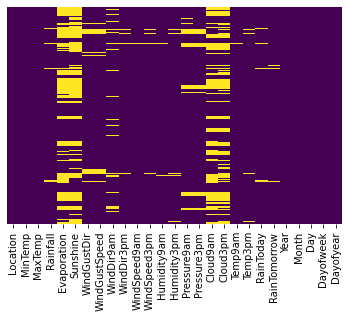

In [7]:

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
#Columns with missing values
cols_with_missing = [col for col in df.columns
                     if df[col].isnull().any()]
print(cols_with_missing)



['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow']


In [9]:
#List of categorical variables
s = (df.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [10]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
for col in object_cols:   
    df[col] = label_encoder.fit_transform(df[col])

In [11]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day,Dayofweek,Dayofyear
0,2,13.4,22.9,0.6,NaN,NaN,13,44.0,13,14,...,NaN,16.9,21.8,0,0,2008,12,1,0,336
1,2,7.4,25.1,0.0,NaN,NaN,14,44.0,6,15,...,NaN,17.2,24.3,0,0,2008,12,2,1,337
2,2,12.9,25.7,0.0,NaN,NaN,15,46.0,13,15,...,2.0,21.0,23.2,0,0,2008,12,3,2,338
3,2,9.2,28.0,0.0,NaN,NaN,4,24.0,9,0,...,NaN,18.1,26.5,0,0,2008,12,4,3,339
4,2,17.5,32.3,1.0,NaN,NaN,13,41.0,1,7,...,8.0,17.8,29.7,0,0,2008,12,5,4,340


In [12]:
df.select_dtypes(include=[np.number]).columns.tolist()

['Location',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'RainTomorrow',
 'Year',
 'Month',
 'Day',
 'Dayofweek',
 'Dayofyear']

In [13]:
from sklearn.impute import SimpleImputer

# Imputation
my_imputer = SimpleImputer()
imputed_df = pd.DataFrame(my_imputer.fit_transform(df))
imputed_df.columns = df.columns

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 27 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  int64  
 1   MinTemp        143975 non-null  float64
 2   MaxTemp        144199 non-null  float64
 3   Rainfall       142199 non-null  float64
 4   Evaporation    82670 non-null   float64
 5   Sunshine       75625 non-null   float64
 6   WindGustDir    145460 non-null  int64  
 7   WindGustSpeed  135197 non-null  float64
 8   WindDir9am     145460 non-null  int64  
 9   WindDir3pm     145460 non-null  int64  
 10  WindSpeed9am   143693 non-null  float64
 11  WindSpeed3pm   142398 non-null  float64
 12  Humidity9am    142806 non-null  float64
 13  Humidity3pm    140953 non-null  float64
 14  Pressure9am    130395 non-null  float64
 15  Pressure3pm    130432 non-null  float64
 16  Cloud9am       89572 non-null   float64
 17  Cloud3pm       86102 non-null

<AxesSubplot:>

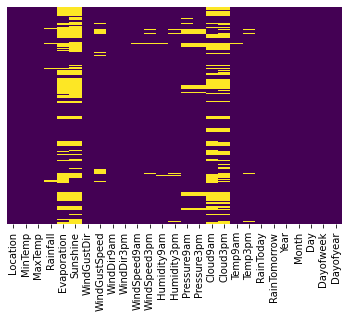

In [15]:

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

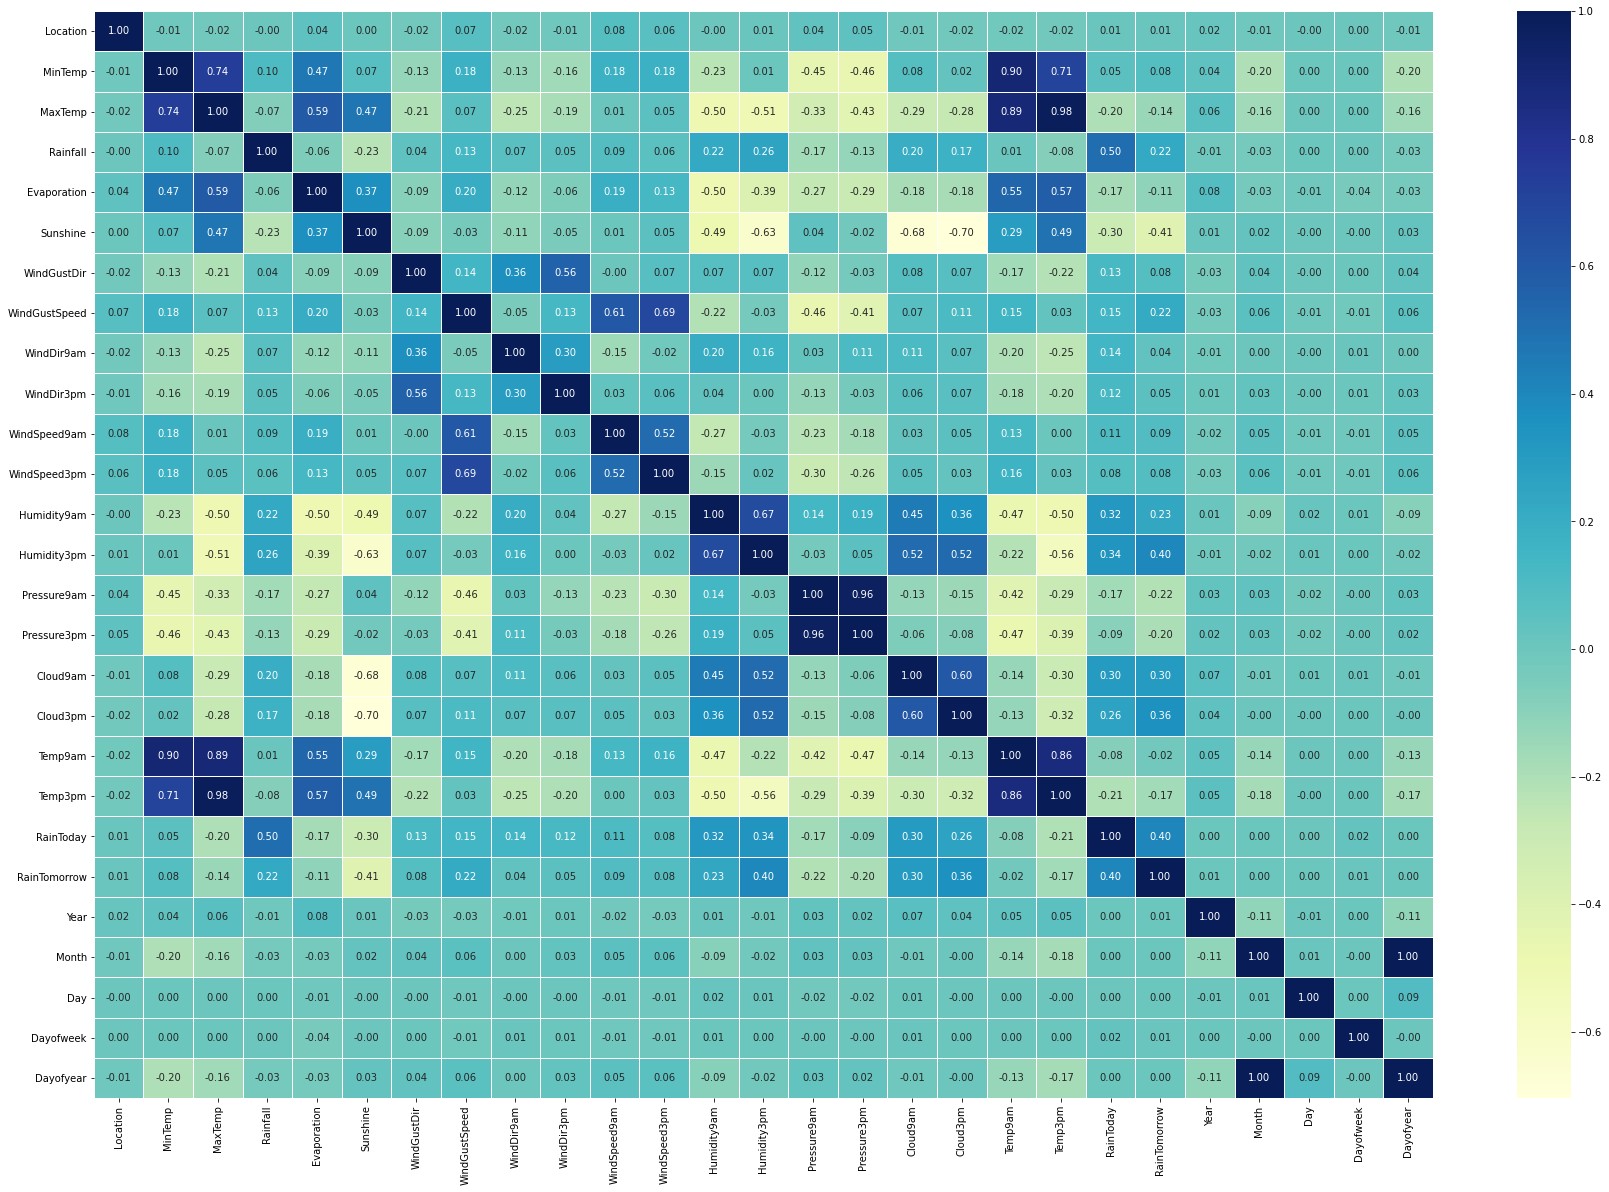

In [16]:

corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(30,20))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidth=0.5,
                 fmt='.2f',
                 cmap='YlGnBu')

In [17]:
#Dropping columns due to hugh correlation
df.drop(columns=['Temp9am','WindSpeed3pm','Pressure3pm'])

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud9am,Cloud3pm,Temp3pm,RainToday,RainTomorrow,Year,Month,Day,Dayofweek,Dayofyear
0,2,13.4,22.9,0.6,NaN,NaN,13,44.0,13,14,...,8.0,NaN,21.8,0,0,2008,12,1,0,336
1,2,7.4,25.1,0.0,NaN,NaN,14,44.0,6,15,...,NaN,NaN,24.3,0,0,2008,12,2,1,337
2,2,12.9,25.7,0.0,NaN,NaN,15,46.0,13,15,...,NaN,2.0,23.2,0,0,2008,12,3,2,338
3,2,9.2,28.0,0.0,NaN,NaN,4,24.0,9,0,...,NaN,NaN,26.5,0,0,2008,12,4,3,339
4,2,17.5,32.3,1.0,NaN,NaN,13,41.0,1,7,...,7.0,8.0,29.7,0,0,2008,12,5,4,340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,41,2.8,23.4,0.0,NaN,NaN,0,31.0,9,1,...,NaN,NaN,22.4,0,0,2017,6,21,2,172
145456,41,3.6,25.3,0.0,NaN,NaN,6,22.0,9,3,...,NaN,NaN,24.5,0,0,2017,6,22,3,173
145457,41,5.4,26.9,0.0,NaN,NaN,3,37.0,9,14,...,NaN,NaN,26.1,0,0,2017,6,23,4,174
145458,41,7.8,27.0,0.0,NaN,NaN,9,28.0,10,3,...,3.0,2.0,26.0,0,0,2017,6,24,5,175


In [18]:
df.dropna(inplace=True)

In [19]:
# Train_test_split

from sklearn.model_selection import train_test_split

features = df.drop('RainTomorrow',axis=1)  # Our X set
target = df['RainTomorrow']  # Our y set

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

In [20]:
from sklearn.metrics import classification_report,accuracy_score

In [21]:
import xgboost as xgb

xgb = xgb.XGBClassifier()
xgb.fit(X_train, y_train)
xgb_predict = xgb.predict(X_test)
print(accuracy_score(y_test, xgb_predict))
print(classification_report(y_test, xgb_predict))

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[04:01:48] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8661572802197802
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      9082
           1       0.75      0.59      0.66      2530
           2       0.79      0.42      0.55        36

    accuracy                           0.87     11648
   macro avg       0.81      0.65      0.71     11648
weighted avg       0.86      0.87      0.86     11648



In [22]:
df.isnull().any()

Location         False
MinTemp          False
MaxTemp          False
Rainfall         False
Evaporation      False
Sunshine         False
WindGustDir      False
WindGustSpeed    False
WindDir9am       False
WindDir3pm       False
WindSpeed9am     False
WindSpeed3pm     False
Humidity9am      False
Humidity3pm      False
Pressure9am      False
Pressure3pm      False
Cloud9am         False
Cloud3pm         False
Temp9am          False
Temp3pm          False
RainToday        False
RainTomorrow     False
Year             False
Month            False
Day              False
Dayofweek        False
Dayofyear        False
dtype: bool

In [23]:

from sklearn.naive_bayes import GaussianNB

bayes = GaussianNB()
bayes.fit(X_train, y_train)
bayes_predict = bayes.predict(X_test)
print(accuracy_score(y_test, bayes_predict))
print(classification_report(y_test, bayes_predict))

0.7948145604395604
              precision    recall  f1-score   support

           0       0.90      0.83      0.86      9082
           1       0.53      0.68      0.60      2530
           2       0.11      0.17      0.13        36

    accuracy                           0.79     11648
   macro avg       0.51      0.56      0.53     11648
weighted avg       0.82      0.79      0.80     11648



In [24]:

from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=7)
forest.fit(X_train, y_train)
forest_predict = forest.predict(X_test)
print(accuracy_score(y_test, forest_predict))
print(classification_report(y_test, forest_predict))

0.8642685439560439
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      9082
           1       0.77      0.55      0.64      2530
           2       0.00      0.00      0.00        36

    accuracy                           0.86     11648
   macro avg       0.55      0.50      0.52     11648
weighted avg       0.85      0.86      0.85     11648



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=1)
tree.fit(X_train, y_train)
tree_predict = tree.predict(X_test)
print(accuracy_score(y_test, tree_predict))
print(classification_report(y_test, tree_predict))

0.7964457417582418
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      9082
           1       0.54      0.56      0.55      2530
           2       0.00      0.00      0.00        36

    accuracy                           0.80     11648
   macro avg       0.47      0.48      0.47     11648
weighted avg       0.80      0.80      0.80     11648



In [26]:

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
print(accuracy_score(y_test, lr_predict))
print(classification_report(y_test, lr_predict))

0.8503605769230769
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      9082
           1       0.72      0.52      0.61      2530
           2       0.00      0.00      0.00        36

    accuracy                           0.85     11648
   macro avg       0.53      0.49      0.50     11648
weighted avg       0.84      0.85      0.84     11648



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0